In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz

# 1. Data Analysis

In [2]:
# a. Import the dataset

df = pd.read_csv('C:/Users/ASUS/Desktop/Intellipaat/Datasets/Heart_Disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# b. Get information about the dataset (mean, max, min, quartiles, etc.)

data_summary = df.describe()

In [5]:
data_summary.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,79.493555,38.393647,38.874881,142.020238,252.074347,38.063089,38.506739,150.131503,38.224566,39.225085,38.876946,38.718997,39.490726,38.380424
std,92.632632,106.917930,106.727255,82.651953,150.358066,107.051229,106.873359,83.703844,106.986239,106.599525,106.723945,106.793721,106.479098,106.923264
min,9.082101,0.000000,0.000000,17.538143,51.830751,0.000000,0.000000,22.905161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.875000,0.349508,0.725248,113.500000,189.750000,0.000000,0.394395,117.875000,0.000000,0.600000,0.904057,0.000000,1.653069,0.374126
50%,54.683168,0.841584,1.016026,130.811881,243.132013,0.074257,0.764026,151.323432,0.398264,1.100339,1.199670,0.864686,2.156766,0.772277
75%,65.000000,1.000000,2.250000,155.000000,281.625000,0.517148,1.250000,175.000000,1.000000,2.750000,2.000000,1.766955,3.000000,1.000000
max,303.000000,303.000000,303.000000,303.000000,564.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000


In [6]:
# c. Find the correlation between all fields

correlation_matrix = df.corr()

In [7]:
correlation_matrix.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.107319,-0.394353,0.518076,0.386106,0.200223,-0.367105,-0.744437,0.387950,0.525714,-0.537429,0.554683,0.222566,-0.559188
sex,-0.107319,1.000000,-0.298431,-0.127053,-0.360518,0.009044,-0.157023,-0.241125,0.340742,0.257083,-0.222807,0.261237,0.413213,-0.480339
cp,-0.394353,-0.298431,1.000000,-0.159927,-0.267920,0.028089,0.152694,0.637521,-0.791023,-0.541385,0.430772,-0.572957,-0.565128,0.771798
trestbps,0.518076,-0.127053,-0.159927,1.000000,0.234465,0.270117,-0.384044,-0.349072,0.218935,0.401758,-0.424804,0.253141,0.112175,-0.370072
chol,0.386106,-0.360518,-0.267920,0.234465,1.000000,-0.029761,-0.378538,-0.202262,0.165715,0.153693,-0.159883,0.155537,0.138467,-0.224354
fbs,0.200223,0.009044,0.028089,0.270117,-0.029761,1.000000,-0.279749,-0.139574,0.035680,0.056513,-0.190793,0.189176,-0.121039,-0.115963
restecg,-0.367105,-0.157023,0.152694,-0.384044,-0.378538,-0.279749,1.000000,0.203932,-0.253808,-0.266601,0.243511,-0.308030,-0.192843,0.321782
thalach,-0.744437,-0.241125,0.637521,-0.349072,-0.202262,-0.139574,0.203932,1.000000,-0.765465,-0.767657,0.740184,-0.625677,-0.465310,0.795193
exang,0.387950,0.340742,-0.791023,0.218935,0.165715,0.035680,-0.253808,-0.765465,1.000000,0.665100,-0.643405,0.455376,0.532638,-0.811954
oldpeak,0.525714,0.257083,-0.541385,0.401758,0.153693,0.056513,-0.266601,-0.767657,0.665100,1.000000,-0.917355,0.538743,0.503485,-0.797677


# 2. Data Visualization

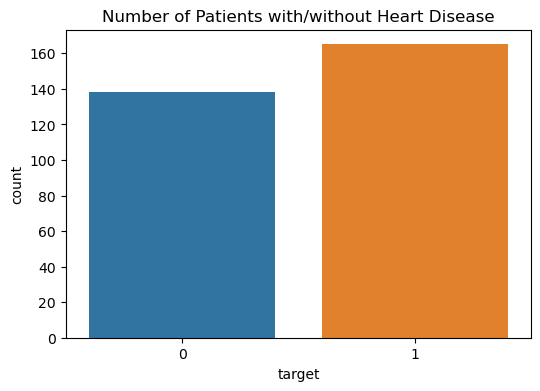

In [8]:
# a. Visualize the number of patients having a heart disease and not having
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Number of Patients with/without Heart Disease')
plt.show()

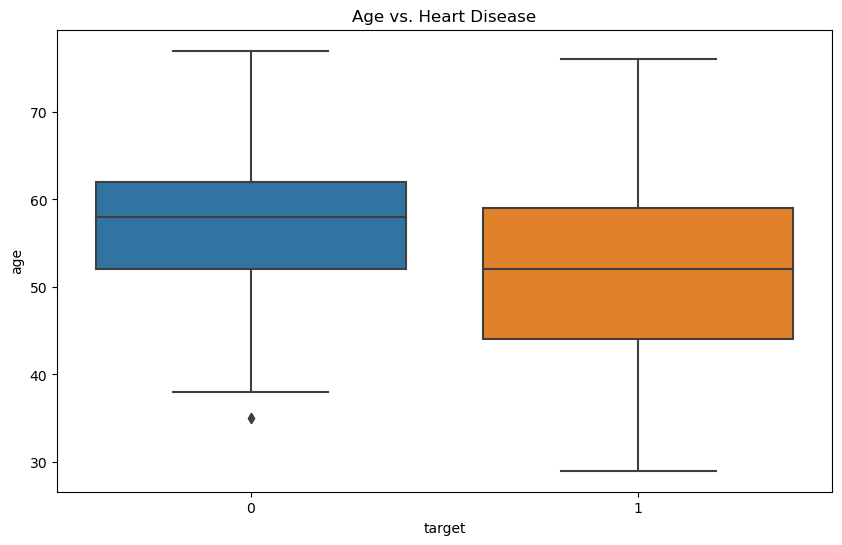

In [9]:
# b. Visualize the age and whether a patient has a disease or not
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs. Heart Disease')
plt.show()

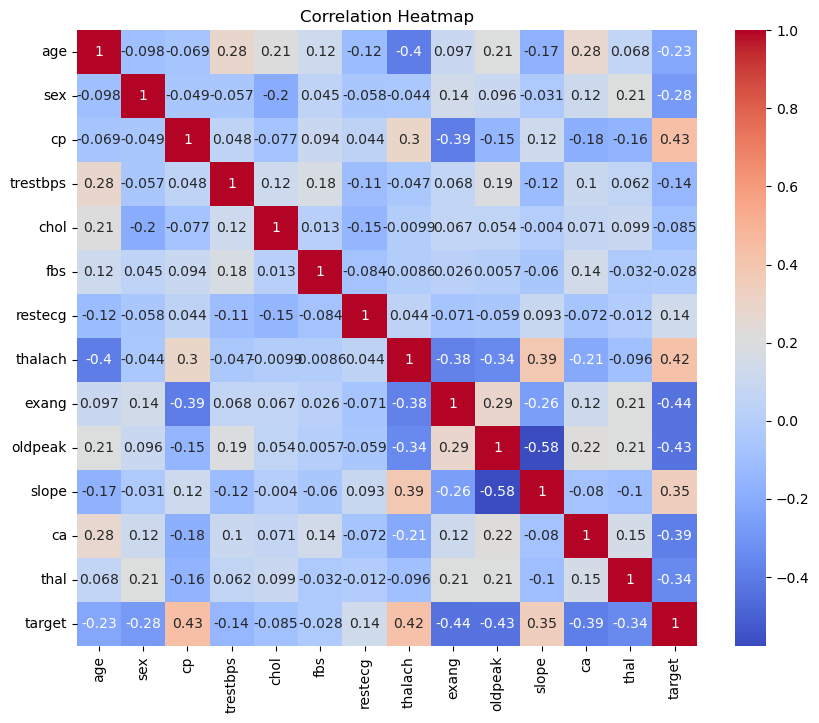

In [10]:
# c. Visualize correlation between all features using a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Logistic Regression

In [11]:
# a. Build a simple logistic regression model
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# iii. Build the confusion matrix and get the accuracy score
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion matrix for logistic regression : ", conf_matrix_logistic)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy score for logistic regression : ", accuracy_logistic)

Confusion matrix for logistic regression :  [[32  9]
 [ 8 42]]
Accuracy score for logistic regression :  0.8131868131868132


# 4. Decision Tree

In [13]:
# a. Build a decision tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

In [14]:
# iii. Build the confusion matrix and calculate the accuracy
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)


In [16]:
# iv. Visualize the decision tree using the Graphviz package

from sklearn import tree  # Import the 'tree' module
from IPython.display import display

dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=X.columns,
                                class_names=['No Disease', 'Has Disease'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree_visualization', view=True)

'decision_tree_visualization.pdf'

In [17]:
# 5. Random Forest
# a. Build a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

In [18]:
# iii. Build the confusion matrix and calculate the accuracy
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)


In [19]:
# iv. Visualize the model using the Graphviz package
dot_data_rf = tree.export_graphviz(random_forest_model.estimators_[0], out_file=None, feature_names=X.columns,
                                   class_names=['No Disease', 'Has Disease'], filled=True, rounded=True, special_characters=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render('random_forest_visualization', view=True)

'random_forest_visualization.pdf'

# 6. Select the best model

In [36]:
# a. Print the confusion matrix of all classifiers

print("Logistic Regression Confusion Matrix:")
print(conf_matrix_logistic)

print("Decision Tree Confusion Matrix:")
print(conf_matrix_decision_tree)

print("Random Forest Confusion Matrix:")
print(conf_matrix_random_forest)

Logistic Regression Confusion Matrix:
[[32  9]
 [ 8 42]]
Decision Tree Confusion Matrix:
[[32  9]
 [15 35]]
Random Forest Confusion Matrix:
[[32  9]
 [ 8 42]]


In [37]:
# b. Print the classification report of all classifiers
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_random_forest))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro a

In [38]:
# c. Calculate Recall Precision and F1 score of all the models

recall_logistic = conf_matrix_logistic[1, 1] / (conf_matrix_logistic[1, 1] + conf_matrix_logistic[1, 0])
precision_logistic = conf_matrix_logistic[1, 1] / (conf_matrix_logistic[1, 1] + conf_matrix_logistic[0, 1])
f1_score_logistic = 2 * (precision_logistic * recall_logistic) / (precision_logistic + recall_logistic)
print("Recall logistic : " , recall_logistic)

recall_decision_tree = conf_matrix_decision_tree[1, 1] / (conf_matrix_decision_tree[1, 1] + conf_matrix_decision_tree[1, 0])
precision_decision_tree = conf_matrix_decision_tree[1, 1] / (conf_matrix_decision_tree[1, 1] + conf_matrix_decision_tree[0, 1])
f1_score_decision_tree = 2 * (precision_decision_tree * recall_decision_tree) / (precision_decision_tree + recall_decision_tree)
print("Recall Decision tree : " ,recall_decision_tree)

recall_random_forest = conf_matrix_random_forest[1, 1] / (conf_matrix_random_forest[1, 1] + conf_matrix_random_forest[1, 0])
precision_random_forest = conf_matrix_random_forest[1, 1] / (conf_matrix_random_forest[1, 1] + conf_matrix_random_forest[0, 1])
f1_score_random_forest = 2 * (precision_random_forest * recall_random_forest) / (precision_random_forest + recall_random_forest)
print("Recall Random forest : " ,recall_random_forest)

Recall logistic :  0.84
Recall Decision tree :  0.7
Recall Random forest :  0.84


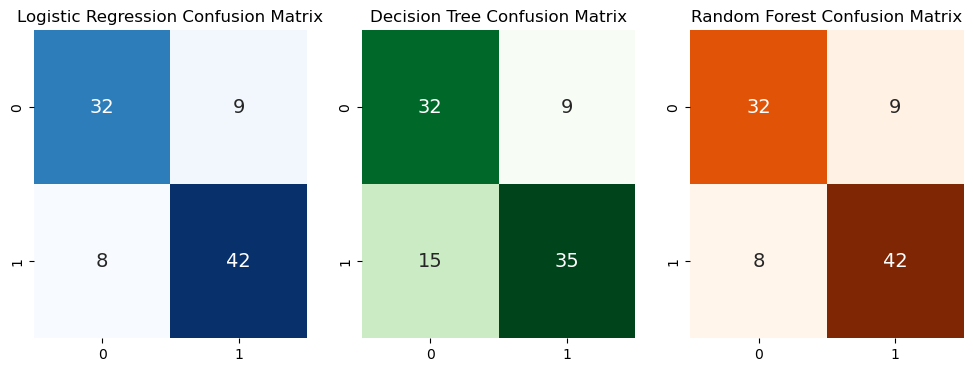

In [39]:
# d. Visualize confusion matrix using heatmaps
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_logistic, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap='Greens', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title("Decision Tree Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_random_forest, annot=True, cmap='Oranges', fmt='d', cbar=False, annot_kws={"size": 14})
plt.title("Random Forest Confusion Matrix")

plt.show()

In [40]:
# e. Select the best model based on the best accuracies

best_accuracy = max(accuracy_logistic, accuracy_decision_tree, accuracy_random_forest)

if best_accuracy == accuracy_logistic:
    best_model = "Logistic Regression"
elif best_accuracy == accuracy_decision_tree:
    best_model = "Decision Tree"
else:
    best_model = "Random Forest"

print("Best Model:", best_model)

Best Model: Logistic Regression
